### 문제
- 각 $h_{\text {upper}}$ 과 $h_{\text {lower}}$ 을 잇는 $n$ 개의 선분 $l$ 이 있고, 그 사이에 $m$ 개의 수평선 $h$ 가 있다. 각 $h_i$ 를 교차하는 $l_j$ 에 대해 leftmost segment 한 $l$ 의 $j$ 를 출력하라.
- 한 점에 대해 $h_i$ 를 교차하는 선분이 여러개 있을 경우, $h_{\text {upper}}$ 위에서 가장 왼쪽에 있는 $l$ 의 $j$ 가 leftmost segment이다.
- 모든 segment는 distinct 하다.
- $1 \le n, m \le 100000$
- 각 $h_{\text {upper}}$ 와 $h_{\text {lower}}$ 의 y좌표는 $-1000 \le h_{\text {lower}} < h_{\text {upper}} \le 1000$
- 각 $l_i$ 에 대해 $h_{\text {upper}}$ 와 $h_{\text {lower}}$ 에 맞닿는 x좌표는 $-500,000 \le x_{\text {lower}} < x_{\text {upper}} \le 500,000$

### 아이디어
- N과 M이 둘다 10만이라 각 선분을 이어놓고 그 교점의 좌표를 비교하는 $\Omicron(NM)$ 으론 풀 수 없다.
- (관찰) 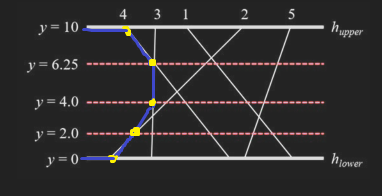
  - leftmost segment들이 만드는 교점들을 이어보니 그림과 같은 convex hull이 나오는 것을 발견했다. (다만 원본 segment 위에 있는 것 같진 않다)\
  이러한 교점들이 만드는 선분을 이으면 반드시 convex hull이 이뤄진다는 것을 증명해보자.
    - 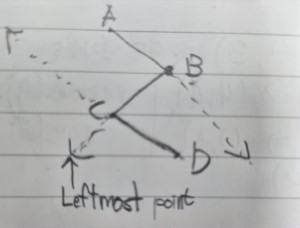
    - $h$ 위의 leftmost한 선분과 $h$ 가 만나는 leftmost 교점 $A, B, C, D$ 가 있고, 점 $C$ 가 오목한 지점이라고 가정해보자.\
    그런데 $\overrightarrow{BC}$ 의 반직선이 $h$와 만나는 교점에서 $D$ 보다 왼쪽에 있으므로, $D$ 는 leftmost가 아니게 된다.\
    따라서 $C$ 는 오목한 지점이 될 수 없다.
- 교점을 한개씩 추가하면서 leftmost한 껍질을 구성하는 것을 $\Omicron(N \log N)$ 에 구할 수 있을 것 같다.

In [ ]:
import io, os
input=io.BytesIO(os.read(0, os.fstat(0).st_size)).readline

from bisect import bisect_left
def CHT(K, M, A):
  intersect = lambda i, j: (M[j] - M[i]) / (K[i] - K[j])

  hull_i = []
  hull_x = []
  order = sorted(range(len(K)), key=K.__getitem__) #기울기 오름차순 정렬
  print(order)
  for i in order:
    while True:
      if not hull_i:
        hull_i.append(i)
        break
      elif K[hull_i[-1]] == K[i]: # 평행하면(기울기가 같으면)
        if A[hull_i[-1]] < A[i]: # minY 위에서 더 작은 쪽(오른쪽에 있는 것)만 남김
          break
        hull_i.pop()
        if hull_x: hull_x.pop()
      else: 
        x = intersect(i, hull_i[-1])
        if hull_x and x > hull_x[-1]: #마지막 선분과의 교점이 현재 교점보다 오른쪽에 있으면 제외
          hull_i.pop()
          hull_x.pop()
        elif hull_x and x == hull_x[-1]: #마지막 선분과의 교점이 현재 교점과 같으면
          if A[hull_i[-1]] < A[i]: #maxY 위에서 더 왼쪽에 있는 것만 남김
            break
          hull_i.pop() 
          if hull_x: hull_x.pop()
        else:
          hull_i.append(i)
          hull_x.append(x)
          break
  return hull_i, hull_x

def query(x, K, M, hull_i, hull_x):
  i = hull_i[bisect_left(hull_x, x)]
  return i

def sol() :
  maxY, minY = map(int, input().split())
  N = int(input())
  K = []
  M = []
  A = []
  for _ in range(N):
    a, b = map(int, input().split())
    K.append((maxY-minY) / (a-b) if a != b else 0)
    M.append(-a * K[-1] + maxY if a != b else 0)
    A.append(a)
  hull_i, hull_x = CHT(K, M, A)
  print(hull_i, hull_x)

  Q = int(input())
  for _ in range(Q):
    x = float(input())
    print(max_query(x, K, M, hull_i, hull_x))

sol()


- y값의 최솟값을 구하는 것이 convex hull trick인데 이 문제는 x값의 최솟값을 구하는 문제이다.
  - 문제로 주어지는 y와 x값을 서로 뒤바꾸면 된다?

In [ ]:
import io, os, sys
input=io.BytesIO(os.read(0, os.fstat(0).st_size)).readline

from bisect import bisect_left
class CHT :
  def __init__(self, A, B, EPS=1e-7) : # A[i] * x + B[i]
    self.A = A # 기울기
    self.B = B # y절편
    self.EPS = EPS # 실수 오차범위
    self.build()
  
  def intersect(self, i, j) :
    return (self.B[j] - self.B[i]) / (self.A[i] - self.A[j])

  def build(self) :
    I, X = [], []    
    order = sorted(range(len(self.A)), key=self.A.__getitem__, reverse=True) #최솟값 query를 위해 기울기 내림차순 정렬
    for i in order:
      while True:
        if not I:
          I.append(i)
          break
        elif (self.A[I[-1]] - self.A[i]) < self.EPS : #기울기가 같은 직선이 있을 경우
          if self.B[I[-1]] < self.B[i]: #y 절편이 더 높은 것만 남긴다
            break
          I.pop()
          if X: X.pop()
        else:
          x = self.intersect(i, I[-1])
          if X and x <= X[-1] :
            I.pop()
            X.pop()
          else:
            I.append(i)
            X.append(x)
            break
    self.I = I
    self.X = X

  def query(self, x): #y = x와 만나는 가장 낮은 볼록껍질 위의
    i = self.I[bisect_left(self.X, x + self.EPS)]
    return i

def sol() :
  maxY, minY = map(int, input().split())
  N = int(input())
  A, B = [], []
  for _ in range(N):
    b, a = map(int, input().split())
    #공간의 y와 x를 뒤바꾼 기울기와 y절편을 입력한 뒤, 볼록껍질을 이루는 y값의 최솟값들을 구한다
    A.append((b - a) / (maxY - minY)) 
    B.append((a * maxY - b * minY) / (maxY - minY))
  cht = CHT(A, B)

  Q = int(input())
  ans = []
  for _ in range(Q):
    x = float(input())
    ans.append(cht.query(x) + 1)
  
  sys.stdout.write('\n'.join(map(str, ans)))

sol()

- 직선의 기울기를 집어넣는걸 몇 시간동안이나 해멘건지 모르겠다..
- 실수 오차를 줄이기 위해서 EPS값을 낮게 지정해주고 그 값보다 낮으면 다음 번째 index를 출력하는 방식으로 구현해야 한다.